# Slippage 

In [1]:
from IPython.display import Latex

In [30]:
%%latex

\begin{equation}
\min_{x(t)} \int_0^T F(x, \dot{x}) dt
\end{equation}
subject to the boundary conditions:
\begin{equation}
x(0) = X, \quad x(T) = 0
\end{equation}
where $x(t)$ represents the number of shares held at time $t$, $X$ is the initial number of shares to be sold, and $T$ is the time horizon for the execution.
The market impact function $F(x, \dot{x})$ is defined as:
\begin{equation}
F(x, y) = -\gamma xy + \eta(-y)^{k+1} + \frac{\lambda\sigma^2}{2}x^2, \quad \gamma, \eta, \lambda, k > 0
\end{equation}
where $y = \dot{x}$ represents the trading rate.
\section{Model Analysis and Solution}
The optimization problem leads to the following differential equation:
\begin{equation}
\lambda\sigma^2 - k\eta(-\dot{x})^{k+1} = -k\eta(-\dot{x}(T))^{k+1}
\end{equation}
Let $v_0 = -\dot{x}(T)$. The general solution can be expressed using the Gauss hypergeometric function $_2F_1$:
\begin{equation}
\frac{1}{v_0}\left{X \cdot {}_2F_1\left(\frac{1}{2}, \frac{1}{k+1}; \frac{3}{2}; -\frac{\lambda\sigma^2X^2}{k\eta v_0^{k+1}}\right) - x \cdot {}_2F_1\left(\frac{1}{2}, \frac{1}{k+1}; \frac{3}{2}; -\frac{\lambda\sigma^2x^2}{k\eta v_0^{k+1}}\right)\right} = t
\end{equation}
To determine $v_0$, we solve the equation:
\begin{equation}
\frac{X}{v_0} \cdot {}_2F_1\left(\frac{1}{2}, \frac{1}{k+1}; \frac{3}{2}; -\frac{\lambda\sigma^2X^2}{k\eta v_0^{k+1}}\right) = T
\end{equation}

<IPython.core.display.Latex object>

v0 = 0.6715252914343783


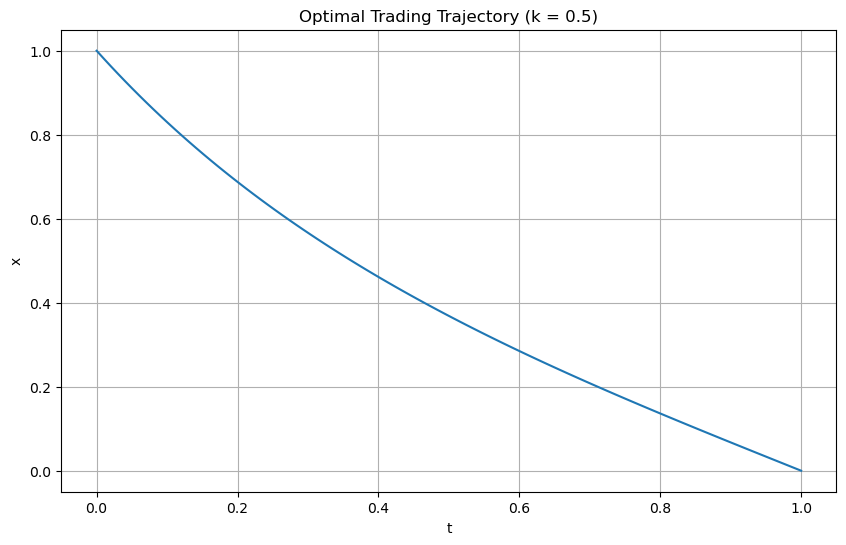

v0 = 0.946202257317474


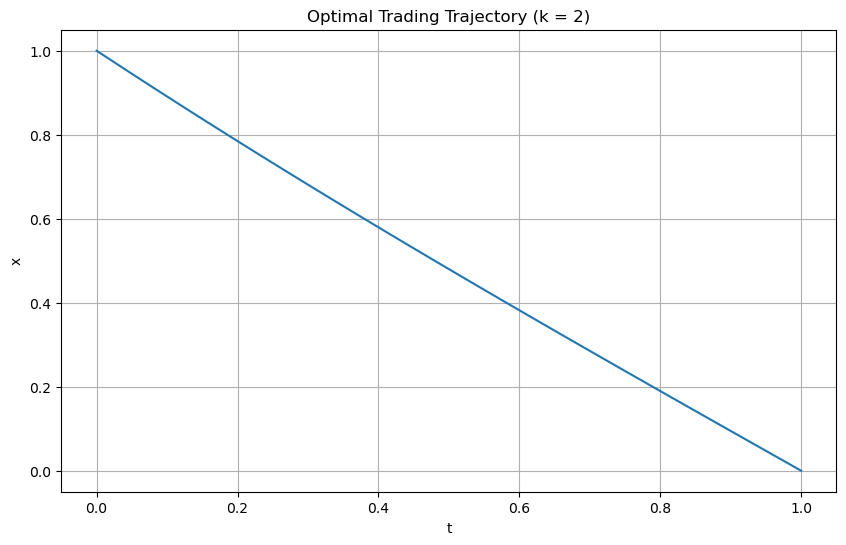

v0 = 0.9953698710039596


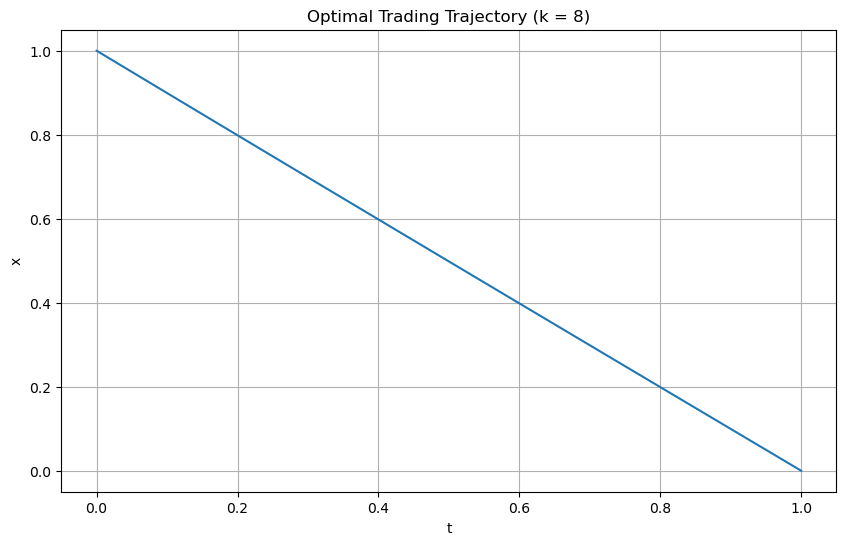

v0 = 0.44623950425311054


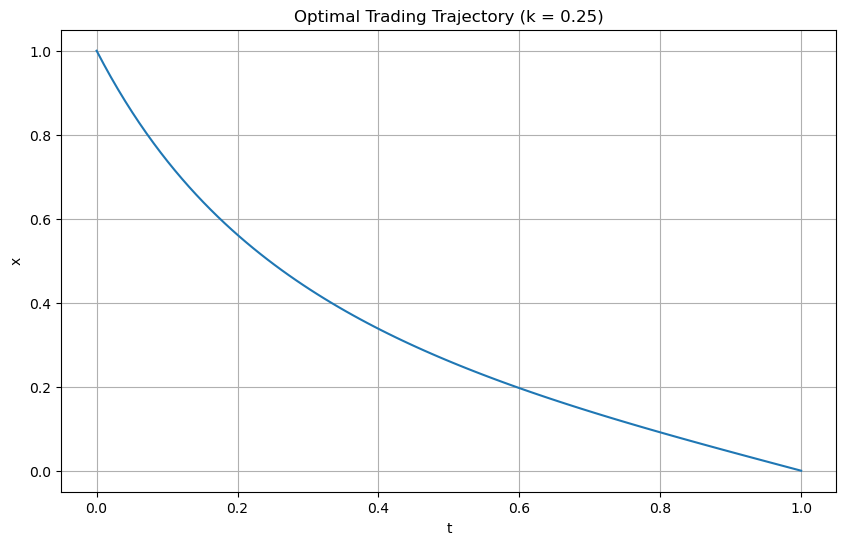

In [28]:
import numpy as np
from scipy import special
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

def hypergeometric_2F1(a, b, c, z):
    return special.hyp2f1(a, b, c, z)

def equation_for_v0(v0, X, T, λ, σ, k, η):
    return (X/v0) * hypergeometric_2F1(0.5, 1/(k+1), 1.5, -(λ*σ**2*X**2)/(k*η*v0**(k+1))) - T

def solve_for_v0(X, T, λ, σ, k, η):
    result = root_scalar(equation_for_v0, args=(X, T, λ, σ, k, η), bracket=[1e-10, 1e10], method='brentq')
    return result.root

def x_t(t, v0, X, T, λ, σ, k, η):
    def equation(x):
        return (1/v0) * (X * hypergeometric_2F1(0.5, 1/(k+1), 1.5, -(λ*σ**2*X**2)/(k*η*v0**(k+1))) - 
                         x * hypergeometric_2F1(0.5, 1/(k+1), 1.5, -(λ*σ**2*x**2)/(k*η*v0**(k+1)))) - t
    
    result = root_scalar(equation, bracket=[0, X], method='brentq')
    return result.root

def plot_optimal_trajectory(X, T, λ, σ, k, η):
    v0 = solve_for_v0(X, T, λ, σ, k, η)
    print(f"v0 = {v0}")

    t_values = np.linspace(0, T, 100)
    x_values = [x_t(t, v0, X, T, λ, σ, k, η) for t in t_values]

    plt.figure(figsize=(10, 6))
    plt.plot(t_values, x_values)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title(f'Optimal Trading Trajectory (k = {k})')
    plt.grid(True)
    plt.show()

# Example usage
X = 1
T = 1
λ = 1
σ = 1
η = 1

# Plot for different k values
k_values = [0.5, 2, 8 , 0.25]
for k in k_values:
    plot_optimal_trajectory(X, T, λ, σ, k, η)